In [2]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For performing statistics operations
from scipy import stats
from scipy.stats import norm, skew
from sklearn.impute import SimpleImputer

In [4]:
# Importing the dataset

df = pd.read_csv('train.csv', index_col=0)
df.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


# Outliers

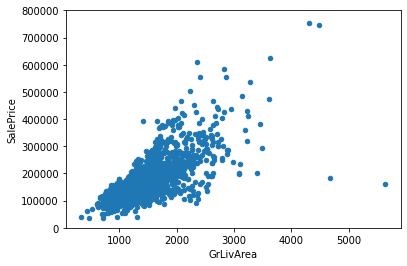

In [5]:
# Let's inspect if there are any outliers in the SalePrice and GrLivArea plot

data = pd.concat([df['SalePrice'],df['GrLivArea']], axis=1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim=(0,800000));

### We can see that there are two outliers at the bottom right. We can also see a linear relationship in the features.

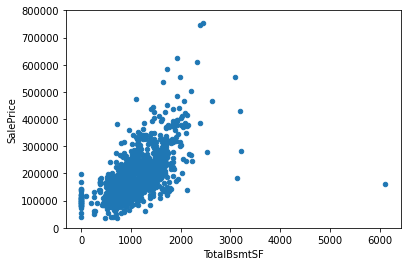

In [6]:
#Now we'll continue ploting different features to see the presence of outliers

data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000));

### We can also see an outlier in the above plot.

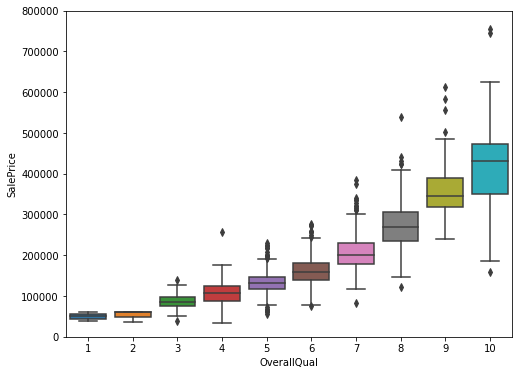

In [6]:
# Now I'll try to inpect the outliers from the categorical features.
data = pd.concat([df['SalePrice'], df['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)
fig.axis(ymin=0, ymax=800000);

### We can see the presence of outliers from the above plot.

## Now let's see how we can remove the above outliers.
###  1 : Univariate Methods

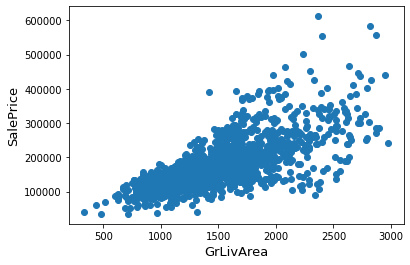

In [7]:
# Deleting outliers
df = df.drop(df[(df['GrLivArea']>3000) & (df['GrLivArea']<6000)].index)

# Let's visualise the graph now
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### We can now see that the few outliers that were present earlier have disappeared.

# Handling Missing Values

In [8]:
# Let's find the total missing data
total = df.isnull().sum(axis=1).sort_values(ascending=False)
total_percent = (df.isnull().sum(axis=1)/df.isnull().count(axis=1)).sort_values(ascending=False)
missing_data = pd.concat([total, total_percent], axis=1, keys=['Total Missing/row', '(%)'])
missing_data.head(30)

,Total Missing/row,(%)
Id,,
534,15,0.1875
1219,15,0.1875
40,15,0.1875
1012,15,0.1875
706,14,0.1750
521,14,0.1750
1180,14,0.1750
1322,11,0.1375
1144,11,0.1375


#### We can see that our dataset has a couple of missing values. It is important to treat the missing values because they reduce the fit of a model and the can also lead to a biased model.

In [11]:
# Let's try removing 
df_copy = df.copy().dropna(how='all')
df.shape

(1442, 80)

In [14]:
# Let's now counting the number of houses with null values
total = df.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df.isnull().sum(axis=0)/df.isnull().count(axis=0))*100).sort_values(ascending=False)

# Let's count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
PoolQC,1438,99.722607
MiscFeature,1388,96.255201
Alley,1352,93.758669
Fence,1166,80.859917
FireplaceQu,689,47.780860
LotFrontage,257,17.822469
GarageYrBlt,79,5.478502
GarageCond,79,5.478502
GarageType,79,5.478502
GarageFinish,79,5.478502


### We can clearly see that the PoolQC, MiscFeature, Alley and fence have the most number of missing values. Let's try dropping them since they are of little significant value.

In [16]:
# Dropping the columns
df1 = df.copy()
df1.drop(["PoolQC", "MiscFeature","Alley","Fence"], axis = 1, inplace = True)

# Let's view the columns left
list(df1.columns.values)[:20]

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle']

## Feature Extraction

### 1. Standardization

In [13]:
# Separating the data into categorical and numeric data
numeric_feature = [a for a in range(len(df.dtypes)) if df.dtypes[a] in ['int64', 'float64']]
numeric_data = df.iloc[:, numeric_feature]

cat_name = df.columns.difference(df.columns[numeric_feature])
cat_data = df.loc[:,cat_name]

In [14]:
# Now let's impute the data first
fill_Nan = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_df = pd.DataFrame(fill_Nan.fit_transform(numeric_data))
imputed_df.columns = numeric_data.columns
imputed_df.index = numeric_data.index
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 non-null   float64
 18  FullBath

In [15]:
imputed_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
6,50.0,85.0,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,0.0,...,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,2009.0,143000.0
7,20.0,75.0,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,0.0,...,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,307000.0
8,60.0,69.0,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,32.0,...,235.0,204.0,228.0,0.0,0.0,0.0,350.0,11.0,2009.0,200000.0
9,50.0,51.0,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,0.0,...,90.0,0.0,205.0,0.0,0.0,0.0,0.0,4.0,2008.0,129900.0


In [17]:
column_transform = numeric_data.columns
column_transform

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
# Now let's standardize the data
from sklearn import preprocessing

standardized_df = preprocessing.scale(imputed_df)
standardized_df

array([[ 0.07625473, -0.21119743, -0.19454079, ..., -1.60431719,
         0.13789927,  0.40961178],
       [-0.86760206,  0.51599143, -0.0771501 , ..., -0.49422823,
        -0.61532325,  0.0430575 ],
       [ 0.07625473, -0.06575966,  0.09128002, ...,  0.98589038,
         0.13789927,  0.61325304],
       ...,
       [ 0.31221892, -0.16271817, -0.1341101 , ..., -0.49422823,
         1.6443443 ,  1.19702466],
       [-0.86760206, -0.06575966, -0.06520687, ..., -0.86425788,
         1.6443443 , -0.49150081],
       [-0.86760206,  0.27359514, -0.04274952, ..., -0.12419858,
         0.13789927, -0.41852936]])

In [18]:
# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

stand_scale = StandardScaler()
imputed_df.loc[:, column_transform] = stand_scale.fit_transform(imputed_df.loc[:, column_transform])
imputed_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
2,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
3,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
4,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
5,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


/home/troye/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


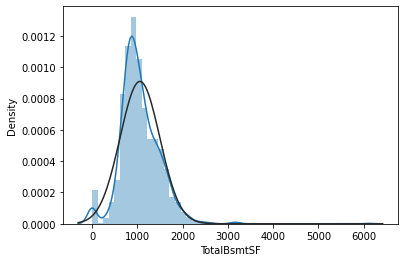

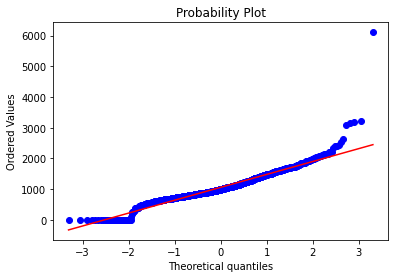

In [19]:
# Histogram and Normal Probability plot
sns.distplot(df['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot = plt)

In [22]:
df['NewBsmt'] = 0
df.loc[df.TotalBsmtSF > 0, 'NewBsmt'] = 1
# Number of houses with a basement
len(df.loc[df['NewBsmt'] == 1])

1423

/home/troye/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


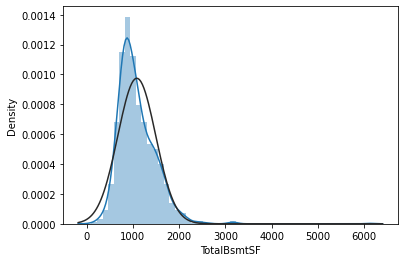

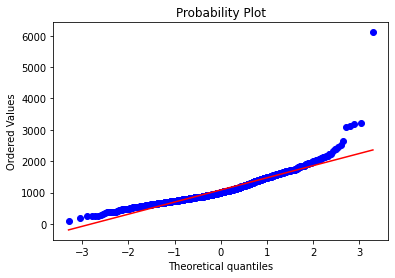

In [25]:
# Transform data
sns.distplot(df[df['TotalBsmtSF']>0 ]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Feature Engineering

In [28]:
# Creating new features by combining already existing ones
# Overall Pool score can be obtained by multiplying PoolArea and PoolQuality
df['PoolScore'] = df['PoolArea'] * df['PoolQC']

# Total number of bathrooms
df['TotalBathroom'] = df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'] + (0.5 * df['HalfBath']))


### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encoding function
def dummyEncode(df):
    columns_to_encode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columns_to_encode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding' +feature)
    return df

In [32]:
label_encoder = LabelEncoder()
df['MSZoning'] = label_encoder.fit_transform(df['MSZoning'])
df['MSZoning']

Id
1       3
2       3
3       3
4       3
5       3
       ..
1456    3
1457    3
1458    3
1459    3
1460    3
Name: MSZoning, Length: 1460, dtype: int64